**Women's Clothing E-Commerce Reviews **

![Image](https://moldkansascity.com/wp-content/uploads/2016/03/customer-reviews.png)

Welcome to my 4th kernel on Kaggle. Through this notebook, I want to explore and analyze the reviews part. All reviews are valuable, and a mix of positive and negative reviews helps to improve consumer trust in the opinions they read. Reviews are certainly an important factor to increase conversions. 
[Here](https://econsultancy.com/blog/9366-ecommerce-consumer-reviews-why-you-need-them-and-how-to-use-them) is the good article on 'E-commerce consumer reviews: why you need them and how to use them'

In this Notebook, I explored the below things:-

1. The age group of female who wrote the most, least, and very few reviews
2. The age group bought what kind of product (Department names) 
3. The age group bought what kind of product (Class names) 
4. The Department has what number or percentage of Class names
5. Which Division name has what number of Department names 
6. Which Division name has what number of Class name
7. Count the frequency of words in Review Text column
8. Wordcloud of the Review Text column
9. Review Text column - How many are positive, negative, and neutral reviews based on the sentiment and polarity value.
10. Wordcloud of the positive Review Text column
11. Wordcloud of the negative Review Text column
12. Used Multinomial Naive Bayes Algorithm to predict which product has 5 rating and which has 1 rating?
13. Used Multinomial Naive Bayes Algorithm to predict which product is recommended and which is not?

**Keys- Multinomial Naive Bayes, WordCloud, TextBlob, Word Frequency, StopWords, Sentiments, NLP, NLTK**


*Required Libraries:-*

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
%matplotlib inline

*Importing file into dataframe*

In [64]:
df_rough=pd.read_csv("./Womens Clothing E-Commerce Reviews.csv",index_col=False)
column_contain=['Clothing ID','Age','Title','Review Text','Rating','Recommended IND','Positive Feedback Count','Division Name','Department Name','Class Name']

In [65]:
df=pd.DataFrame(data=df_rough,columns=column_contain)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


*This dataset has 23486 entries and 9 columns. Some of the entries are missing like Title, Division Name, Department Name, and Class Name. *

In [66]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [67]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


*Is there any correlation between user's rating and reviews length ?*

In [68]:
df['Review Text']=df['Review Text'].astype(str)
df['Review Length']=df['Review Text'].apply(len)

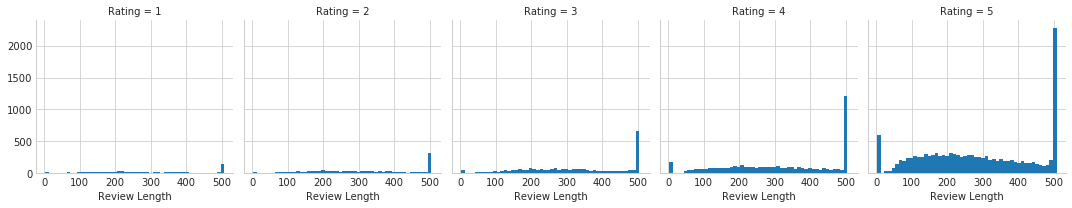

In [69]:
g = sns.FacetGrid(data=df, col='Rating')
g.map(plt.hist, 'Review Length', bins=50)

*From the above chart, we can say that the users gave 5 rating oftenly. Infact, there are less no of users who gave rating 1 and 2.*

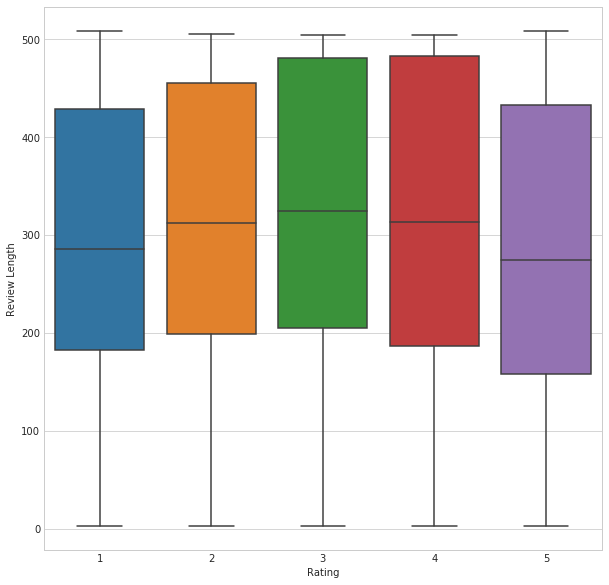

In [70]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Rating', y='Review Length', data=df)

*From the above boxplot, we can conclude that the rating 3 and 4 have more lenth in review. *

In [71]:
rating = df.groupby('Rating').mean()
rating.corr()

,Clothing ID,Age,Recommended IND,Positive Feedback Count,Review Length
Clothing ID,1.000000,-0.977686,-0.303355,0.378828,0.975037
Age,-0.977686,1.000000,0.115681,-0.194958,-0.930949
Recommended IND,-0.303355,0.115681,1.000000,-0.987748,-0.307808
Positive Feedback Count,0.378828,-0.194958,-0.987748,1.000000,0.384312
Review Length,0.975037,-0.930949,-0.307808,0.384312,1.000000


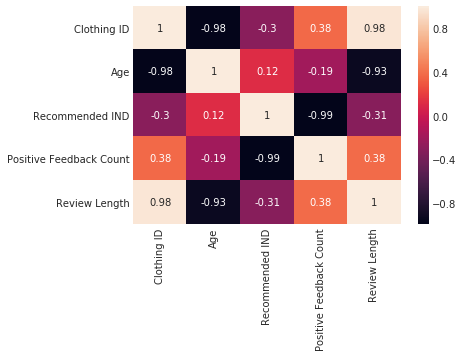

In [72]:
sns.heatmap(data=rating.corr(), annot=True)

The above correlation map shows that there is not much correlation among the column. The columns like review length and positive feedback count are slightly correlated. And, the number 0.93 in negative inidicates that it is nowhere correlated with Review Length. As the Age grows the length of review decreases.

In [73]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Length
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,53
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,303
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192


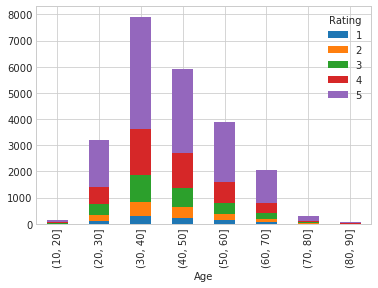

In [74]:
df.groupby(['Rating', pd.cut(df['Age'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)

*From the above barplot, we can say that the age group 10-20 gave less rating. It is obvious. In this age group teenagers generally don't care about online shopping and reviews. The age group 30-40 gave more 5 rating as compared to all the other age groups. In fact, this is the age group who gave most of the reviews and ratings. And similarly, the age group above 70 did not care about the online shopping stuff. *

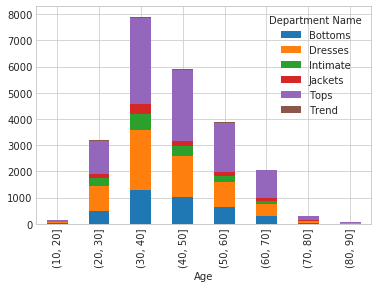

In [75]:
plt.figure(figsize=(15,15))
df.groupby(['Department Name', pd.cut(df['Age'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)

*In the above barplot, I want to concentrate on the department and the age group. The females from 20-70 age were more active and bought the stuff online. From the above barplot, we can conclude that the females were more focussed on Tops and Dressess department. And, somewhat focussed on Bottoms too but not that much. They were less concentrated on Trend department. *

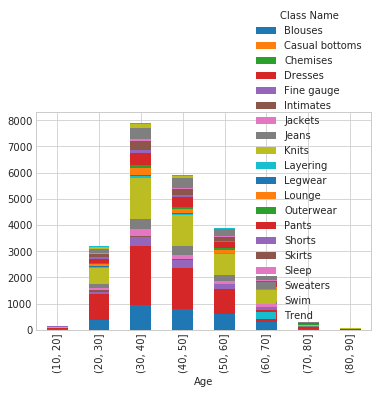

In [76]:
plt.figure(figsize=(15,15))
df.groupby(['Class Name', pd.cut(df['Age'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)


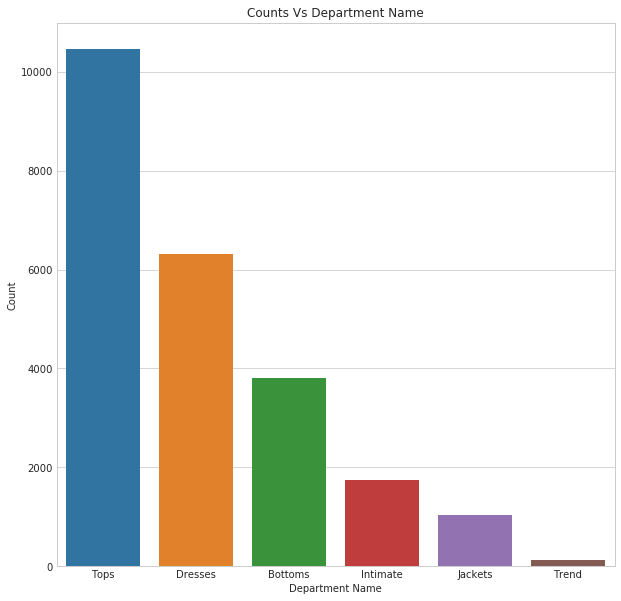

In [77]:
z=df.groupby(by=['Department Name'],as_index=False).count().sort_values(by='Class Name',ascending=False)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=z['Department Name'],y=z['Class Name'], data=z)
plt.xlabel("Department Name")
plt.ylabel("Count")
plt.title("Counts Vs Department Name")

*The above barplot shows that there are maximum entries for Top which is around 10500. And, then the Dresses department is having around 6000 entries*

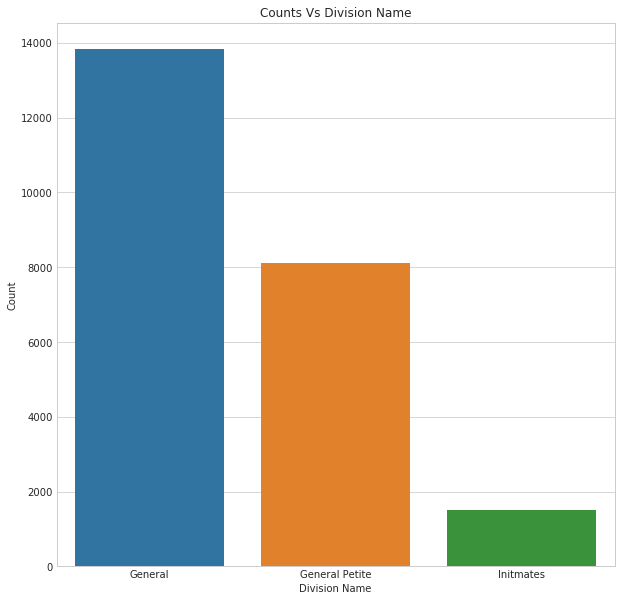

In [78]:
w=df.groupby(by=['Division Name'],as_index=False).count().sort_values(by='Class Name',ascending=False)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=w['Division Name'],y=w['Class Name'], data=w)
plt.xlabel("Division Name")
plt.ylabel("Count")
plt.title("Counts Vs Division Name")

*In our dataset, there are 3 divisions which are General, General Petite, and Intimates. The General Division producs were more sold out as compared to General Petite and Intimates. There were around 14K producs were sold in General division, 8K products in General Petite division and around 1600 products were sold in Initmates division.  *

In [79]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/paperspace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[('dress', 10567), ('love', 8951), ('size', 8774), ('top', 7418)]


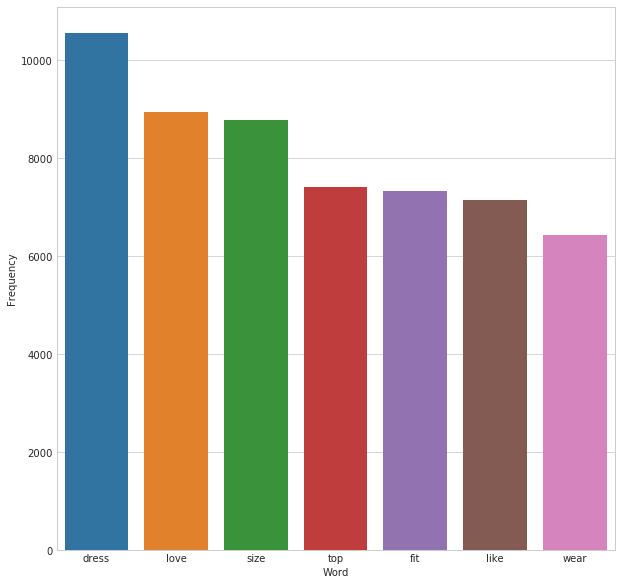

In [80]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
import re

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

a = df['Review Text'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
print(word_dist.most_common(4))
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
rslt
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

*The above barplot calculates the frequency of the word in Review Text column. The word Dress appeared more in the text. Next to this, the word Love comes second which is an indicator of positive review. *

In [81]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

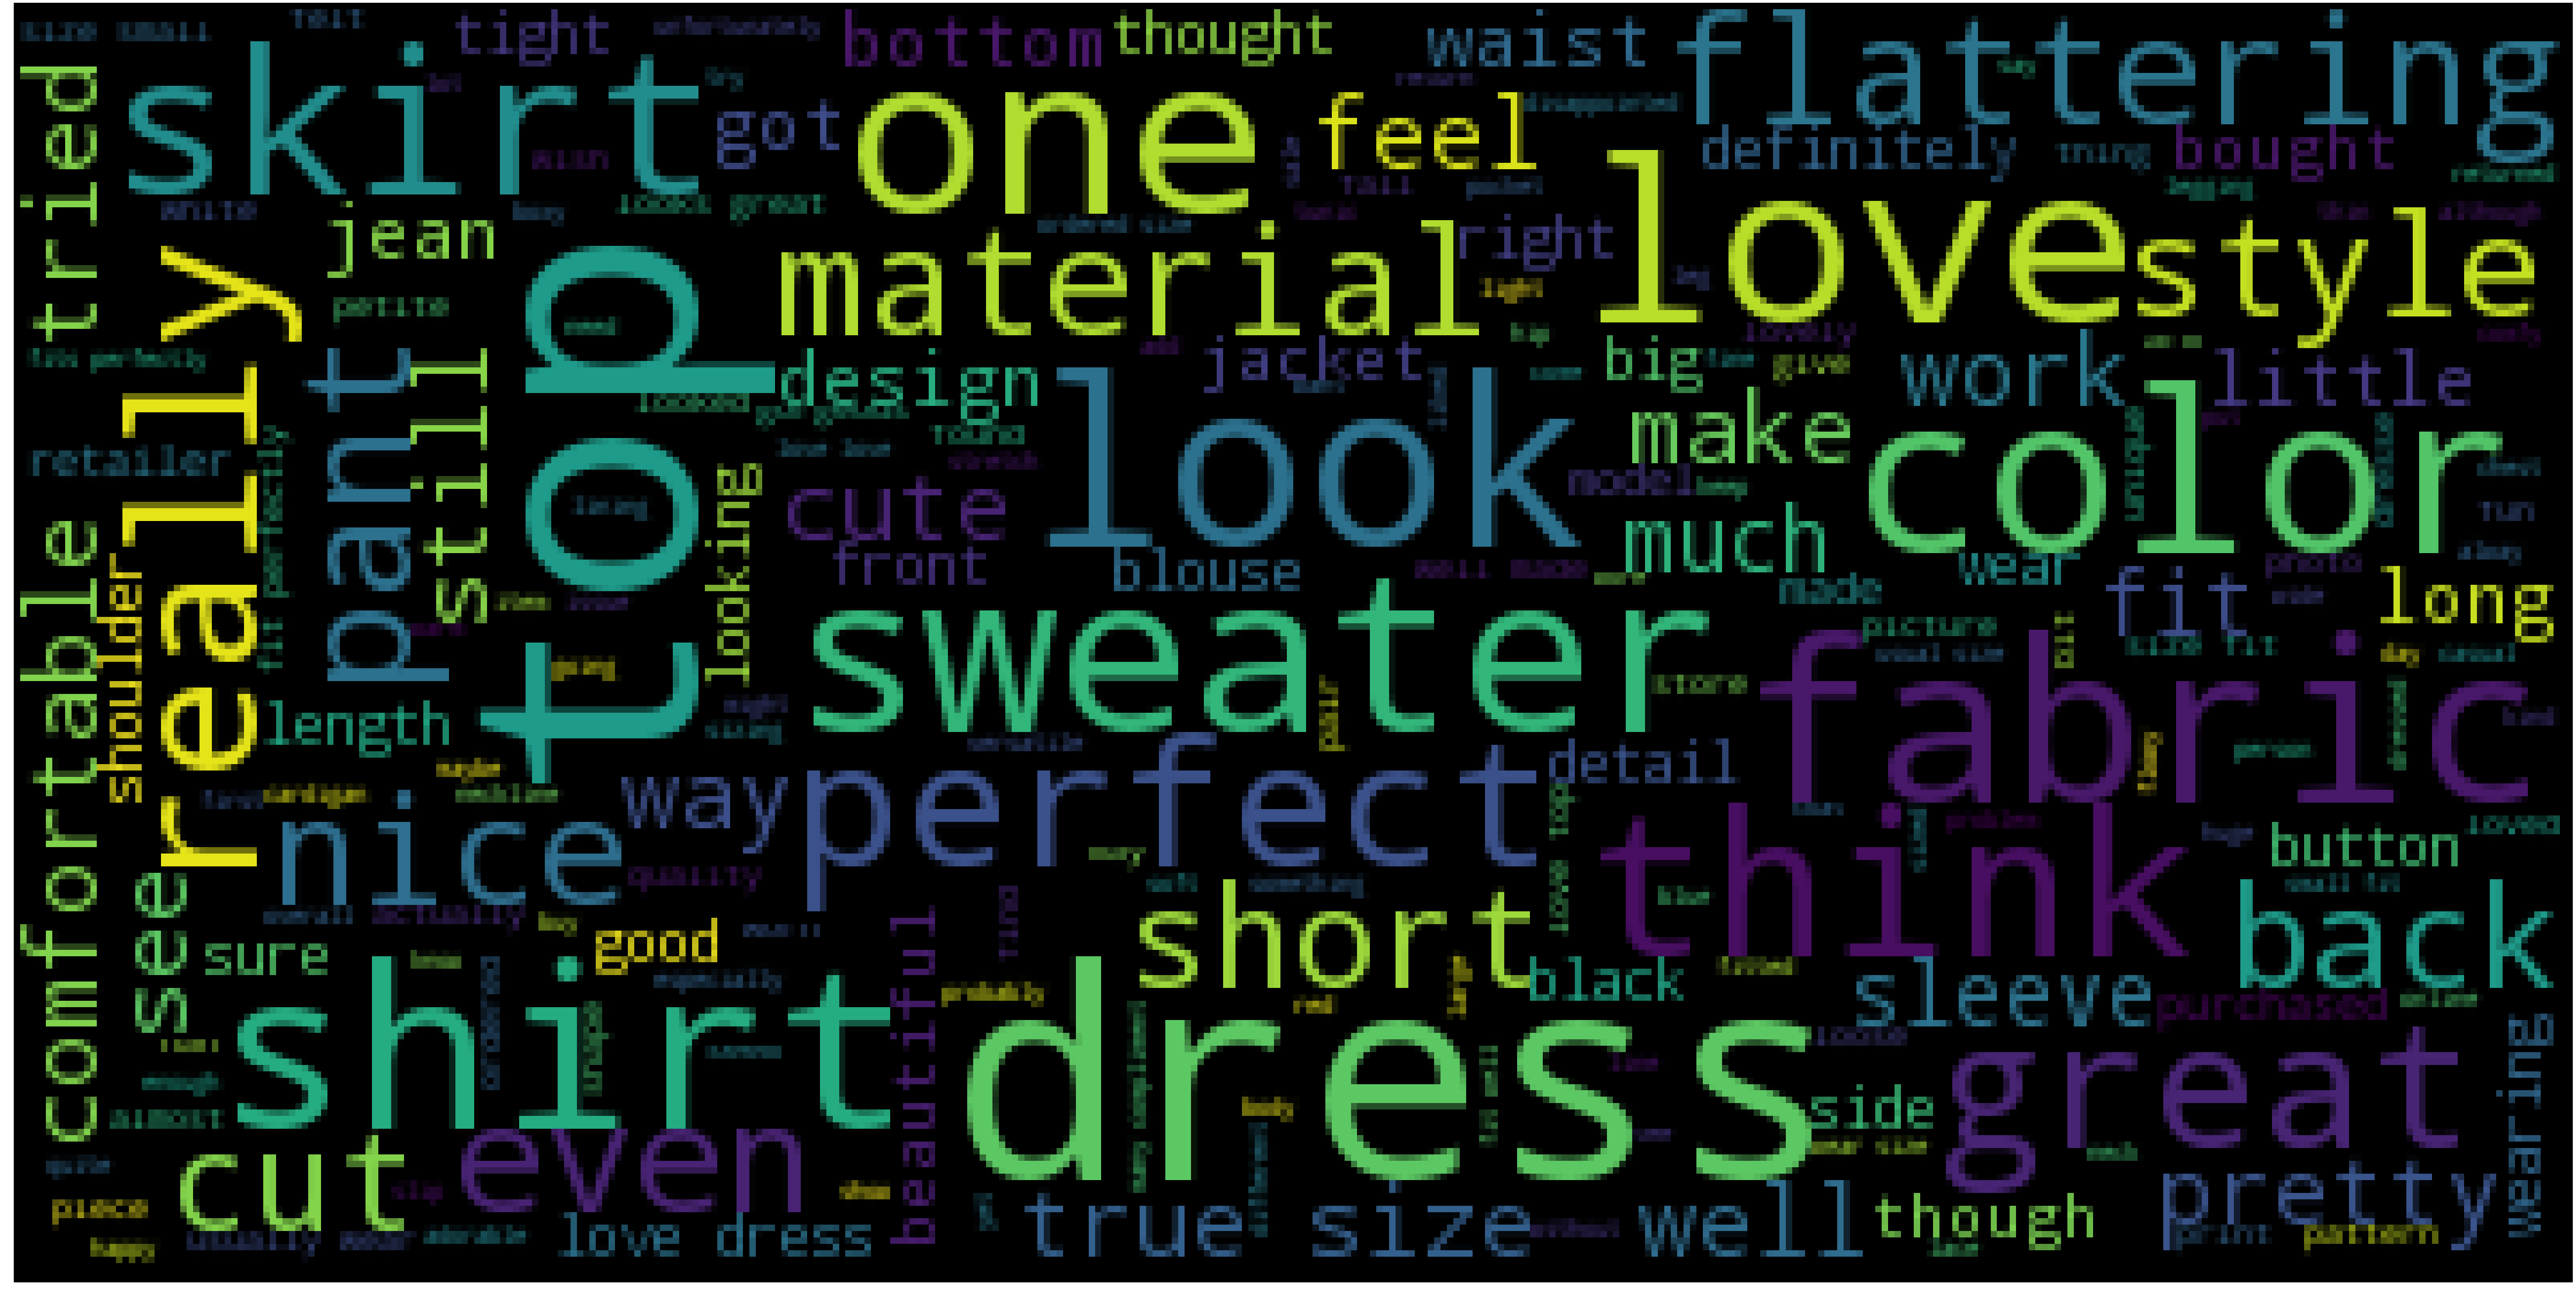

In [82]:
wc(cleaned_data_title,'black','Most Used Words')

*The above wordcloud is for the most oftenly used words in the Review Text column*

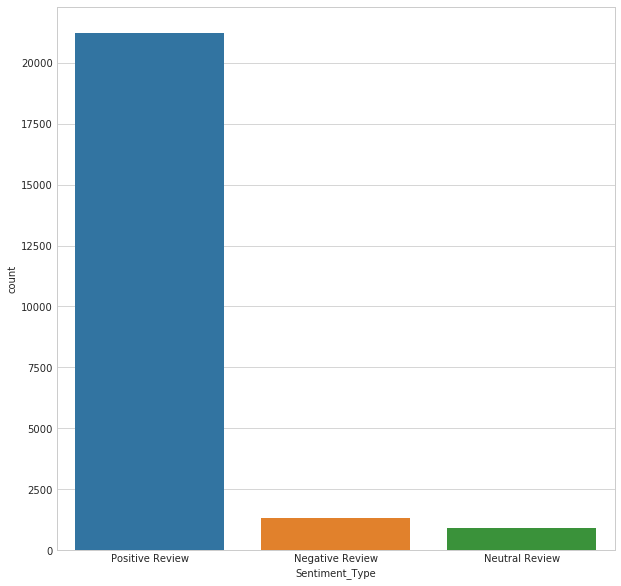

In [83]:
from textblob import TextBlob

bloblist_desc = list()

df_review_str=df['Review Text'].astype(str)
for row in df_review_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['Review','sentiment','polarity'])
 
def f(df_polarity_desc):
    if df_polarity_desc['sentiment'] > 0:
        val = "Positive Review"
    elif df_polarity_desc['sentiment'] == 0:
        val = "Neutral Review"
    else:
        val = "Negative Review"
    return val

df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)


*According to the above graph, there are more positive reviews but again it depends on the polarity value. I condsidered sentiment value > 0 is Positive Review..*

In [84]:
positive_reviews=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Positive Review']
negative_reviews=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Negative Review']

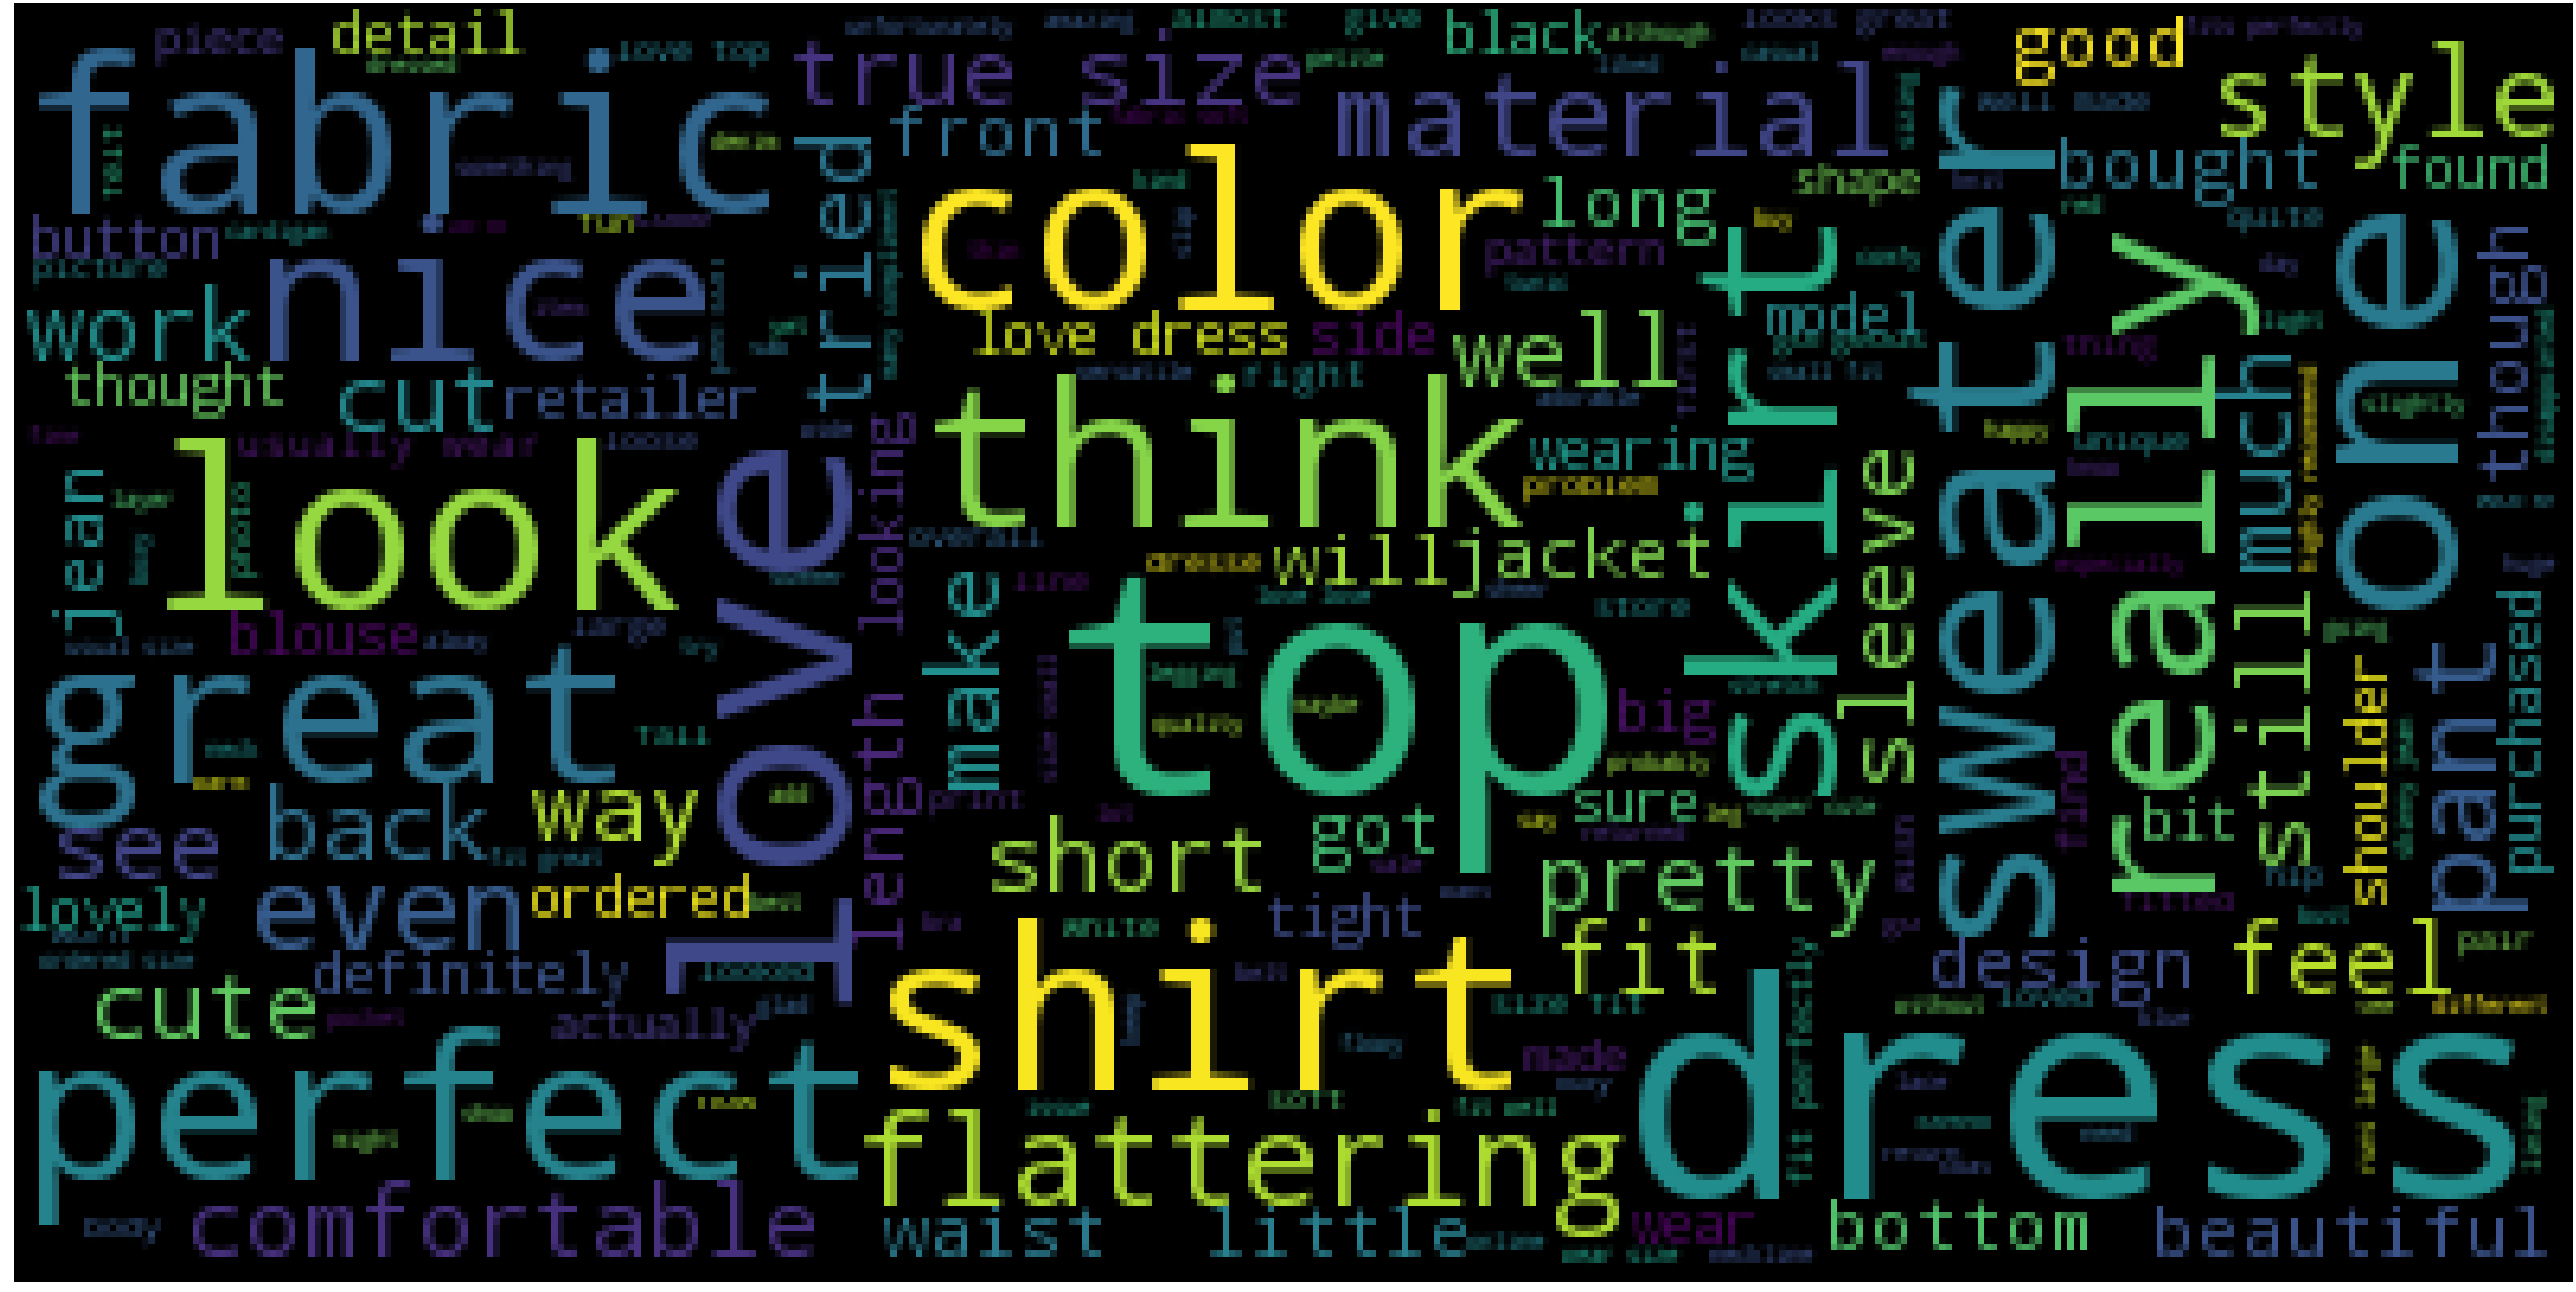

In [85]:
wc(positive_reviews['Review'],'black','Most Used Words')

 *The above wordcloud only for the Positive reviews.*

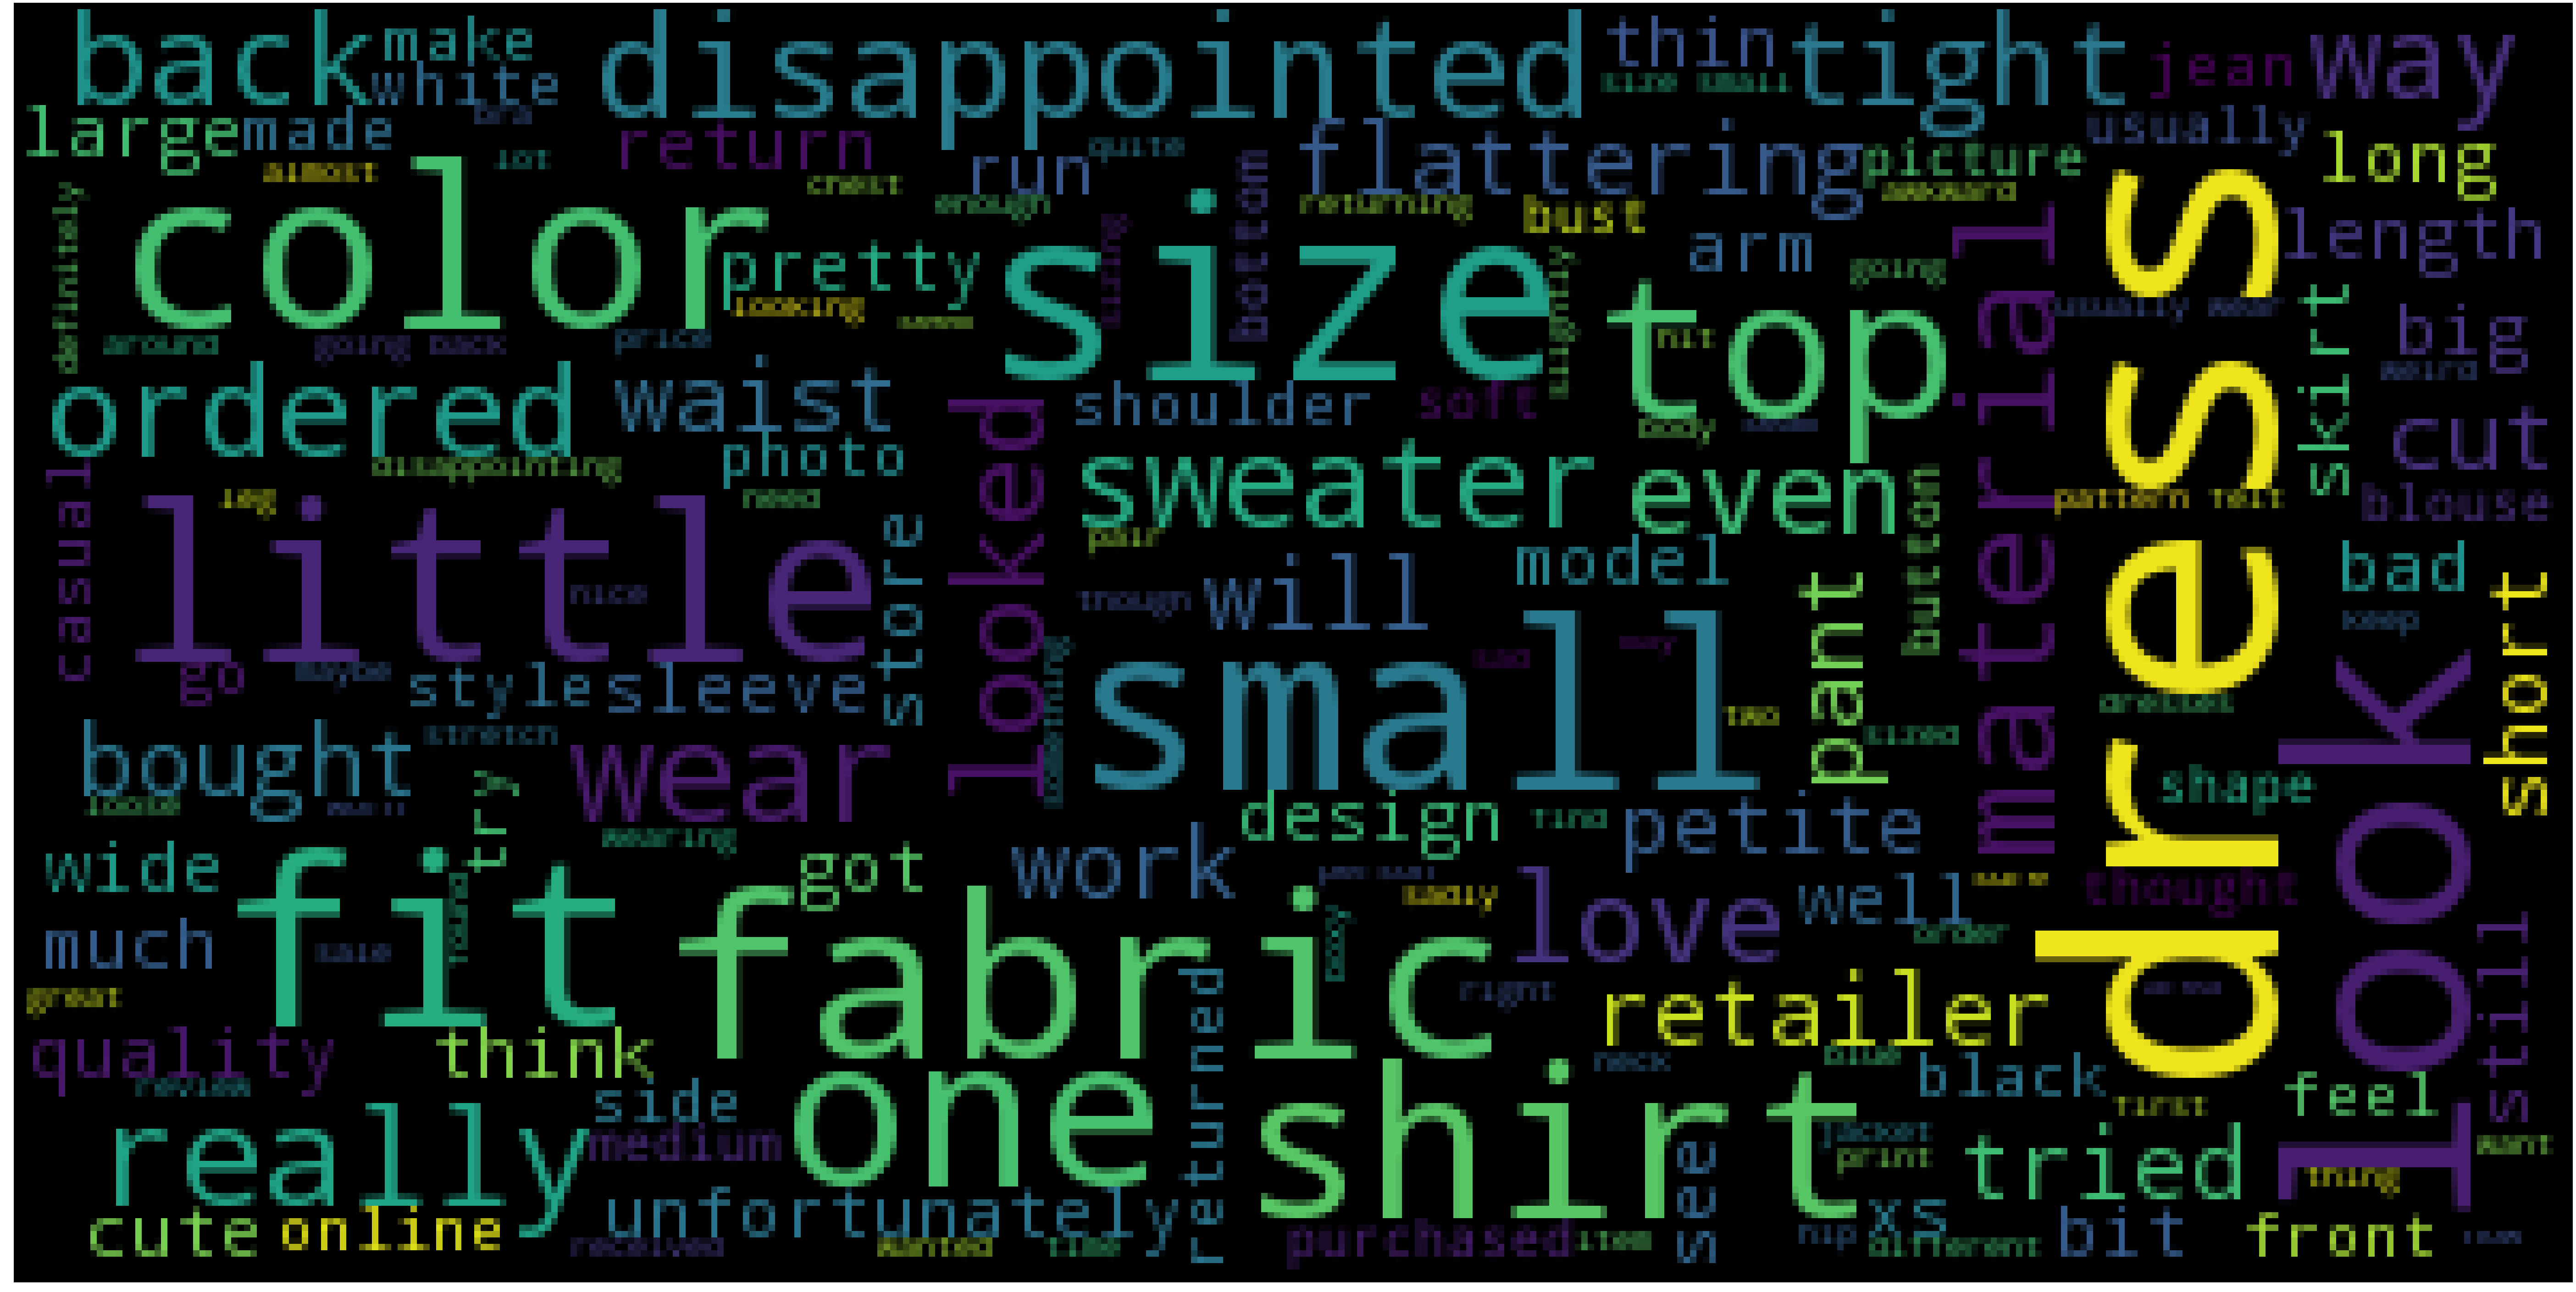

In [86]:
wc(negative_reviews['Review'],'black','Most Used Words')

*The above wordcloud only for the Negative reviews.*

In [87]:
import string
def text_process(review):
    nopunc=[word for word in review if word not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [597]:
df['Review Text'].head(5).apply(text_process)

2    [high, hopes, dress, really, wanted, work, ini...
3    [love, love, love, jumpsuit, fun, flirty, fabu...
4    [shirt, flattering, due, adjustable, front, ti...
5    [love, tracy, reese, dresses, one, petite, 5, ...
6    [aded, basket, hte, last, mintue, see, would, ...
Name: Review Text, dtype: object

*This is how the above function works. Basically, the above function removes the punctuations, converts word into lower case, and removes the stopwords from the sentence.*

**Vectorization**

*At this moment, we have our review text column as a token (which has no punctuations and stopwords).
We can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.*


@m:
most of my work starts here.

all of my comments are wrapped in triple apostrophy and start with "@m" (you can serach for this token to quickly look at my comments)

so far: I look at the data exploration in the original notebook as well as a few other notebooks 
- assume we are classifying 1 and 5 star ratings: 
    - this is what the original sample notebook attempted 
    - the business reason makes sense since the most extreme values are the most informative 
    - and most humans cannot distringuish luke warm vs luke cold reviews based on text along
- assume that this assimengment is for exploraiton:
    - i optimized for fast prototyping and readablity
    - so I am a little "fast and lose" with coding standards (i.e. global var names, redundant code etc... will refactor the pipeline later if needed)
- things to take care of:
    - class im-balance; the 5 vs 1 reviews are approx 14:1
    - consider using both text columns as features, or use title only 
        - (since we are only classifying extreme ratings) the could give us enough data to make a strong prediction
    - other features?
        - I did not focus on that although given the strong correlations of 'Recommended IND' and 'Polarity_score' from TextBlob would certainly improve performance
        - I did not focus on additional features since it's relatively simple to add these as features to our exsting model (concat new col to the string embeddings) 
            - and it's unrealistic to expect to have these avail for a new review (either you have the whole review with a rating or you only have a informal review that's all text)
                - this could be consider a form of data leak if we do not have these features to rely on in the wild
            - the more valuable and fun problem is if we can tell how a customer will strongly rate a item based on what they say about the item
            - (we can scrape social media to identify superfans and ask for offical endorsement or identify unhappy customers (who complain online) before they leave a bad offical review)

Q1:
how to improve NB:
    - defining a class_piror (for class imbaalance and over-ride default fit_prior)
    - put more into training set (.1 or .2 test split)
    - set alpha (smoothing factor to 0.25) => less smoothing = more accuracy but watch for overfitting.
    - these params can be tuned separately later systematically via random or gridSearch (I just hand tuned them for now since NB is unlikely to perform better than other benchmark models)
    - I achieved a small improvement in all 3 metrics to 0.96 (although we should cross-validate to make sure this improvement is statistially significant)

Q2
try other models:
    - more details below
Q3:
    - more details below
    - NB is parametric (assums certain underlying distrbutions) and generative (which tendes to perform well against a descriminative model if we have a small data set and the underlying assumptions are true)
    - NB assums conditional independence which I cannot say is true for our case
    - NB is fast
    - we have enough data for a more complex, discrminative model to outcompete NB
    
    - gbdt performs better but is slower and prone to overfitting (boosting and bagging, high time complexity, requires more data)
    - linearSVC: fast and simple to fit, hinge loss optimizes for classification and convex optimization problems give better confidence of optimality


In [638]:
df=df.dropna(axis=0,how='any')
rating_class = df[(df['Rating'] == 1) | (df['Rating'] == 5)]
X_review=rating_class['Review Text']
X_title = rating_class['Title']
y=rating_class['Rating']
textFeat = X_review  

'''
@m:
the switch above allows for quick testing of X_review or X_title as features.
'''

In [640]:
rating_class

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Length
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,496
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,166
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses,360
12,1095,53,Perfect!!!,More and more i find myself reliant on the rev...,5,1,2,General Petite,Dresses,Dresses,502
13,767,44,Runs big,Bought the black xs to go under the larkspur m...,5,1,0,Initmates,Intimate,Intimates,377
17,853,41,Looks great with white pants,Took a chance on this blouse and so glad i did...,5,1,0,General,Tops,Blouses,296
18,1120,32,Super cute and cozy,"A flattering, super cozy coat. will work well...",5,1,0,General,Jackets,Outerwear,167
19,1077,47,Stylish and comfortable,I love the look and feel of this tulle dress. ...,5,1,0,General,Dresses,Dresses,292


In [641]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [642]:
bow_transformer=CountVectorizer(analyzer=text_process, ngram_range=(1, 1)).fit(textFeat)    # !!!


In [643]:
tfidf_vectorizer = TfidfVectorizer(analyzer=text_process, ngram_range=(1, 1)).fit(textFeat)    # !!!


In [644]:
import gensim
from gensim import models

word2vec_path = "../insightPriv/GoogleNews-vectors-negative300.bin.gz"
# word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [645]:
word2vec

In [646]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_questions, generate_missing=False, col='Title'):
    embeddings = clean_questions[col].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [647]:
print(len(bow_transformer.vocabulary_))

13953


In [648]:
print(len(tfidf_vectorizer.vocabulary_))

13953


*Now, the above number is the  size of the vocabulary stored in the vectoriser (based on X_review) *

In [649]:
'''

# text processing switch. uncomment to switch

X_feat = get_word2vec_embeddings(word2vec, rating_class, col='Review Text')
X_feat = tfidf_vectorizer.transform(textFeat)
X_feat = bow_transformer.transform(textFeat)

'''

# active text feature processor
X_feat = bow_transformer.transform(textFeat)


'''
@m: 
in this cell we explore text processing options:
- the major variables are the type of processor, the n-gram options and how it performs on both the text columns (title and reviews)
- ideally we can identify/select text processing piplines against the benchmark models then fine tune models


Although I tested word2vec and tfidf as text processing options:
- word2vec performed the worst
- countvec performed the best in nearly all cases
- tfidf had a slight performance increase in certain cases (for reviews but not titles)
- I tested ngram options for both countVec and Tfidf,
    - no significant improvement results (so we'll keep things simple and keep with 1gram)


Conclusion:
drop word2vec from evaluation and test countVec then check tfidf (if time allows), no-ngram
'''



"\n@m: \nin this cell we explore text processing options:\n- the major variables are the type of processor, the n-gram options and how it performs on both the text columns (title and reviews)\n- ideally we can identify/select text processing piplines against the benchmark models then fine tune models\n\n\nAlthough I tested word2vec and tfidf as text processing options:\n- word2vec performed the worst\n- countvec performed the best in nearly all cases\n- tfidf had a slight performance increase in certain cases (for reviews but not titles)\n- I tested ngram options for both countVec and Tfidf,\n    - no significant improvement results (so we'll keep things simple and keep with 1gram)\n\n\nConclusion:\ndrop word2vec from evaluation and test countVec then check tfidf (if time allows), no-ngram\n"

**Training Data and Test Data**

In [650]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.1, random_state=42)

'''
@m: 
test_size is the variable that has the biggest impact on model performance here.
ideally we want as much data in the train set as possible with at lest a few hundred data points in the testset minority classes
a test size of 0.2 is a good balance
(if test set is any smaller then the test set distribution could be significantly different than the trainset)

'''

'\n@m: \ntest_size is the variable that has the biggest impact on model performance here.\nideally we want as much data in the train set as possible with at lest a few hundred data points in the testset minority classes\na test size of 0.2 is a good balance\n(if test set is any smaller then the test set distribution could be significantly different than the trainset)\n\n'

**Train our model **

*To predict the rating of the reviews,  we will use Naive Bayes Machine Learning Algorithm. Since this works well with the text data. *

In [651]:

'''
@m: 

here we benchmark a set of models more or less out of the box:
we want to identify what models to keep and tune.

potential options are:
NB - fast, easy to train/tune (very few hyper-params), good for wide data (small N, high dimensions), mostly linear.
    - MultinomialNB is the best option. 
LogReg - relatively fast, interpretable, linear (assumes independnce)
LinearSVC - fast (optimized linear classifer in Liblinear), good for wide data, generates good classifier for binary (better than logreg for high-dim)
RF - (xgboost) everything under the kitchen sink kind of model, can overfit, non-linear, slower and harder to train, tolerant to dirty data, but can have better accuracy
'''


from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from scipy.sparse import csr_matrix, isspmatrix

nb = MultinomialNB(alpha=0.25,  class_prior=[.04,.96])#, alpha=0.25,priors=[.04,.96] for gaussian NB
nbxtrain=X_train
if isspmatrix(X_train):
    nbxtrain=X_train.toarray()
nb.fit(nbxtrain, y_train)

MultinomialNB(alpha=0.25, class_prior=[0.04, 0.96], fit_prior=True)

**Testing the model**

In [652]:
nbxtest=X_test
if isspmatrix(X_test):
    nbxtest=X_test.toarray()
nbpred=nb.predict(nbxtest) #.toarray()

*Once we predicted the values, now the most important task is to check and evaluate our model against the actual ratings (stored in y_test) using confusion_matrix and classification_report from Scikit-learn.*

In [653]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, nbpred))
print('\n')
print(classification_report(y_test, nbpred))
# print(nb.class_prior_)
print(nb.class_count_)

[[  36   22]
 [  26 1071]]


             precision    recall  f1-score   support

          1       0.58      0.62      0.60        58
          5       0.98      0.98      0.98      1097

avg / total       0.96      0.96      0.96      1155

[  633.  9762.]


*Woaah !! Our model achieved 95% efficiency. It means the business can predict the users liked the product or not*

**try logreg and gbdt**

In [654]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
gbdtparams = {'n_estimators': 70, 'max_depth': 10,
          'eval_metric': 'auc'}
gbdt = XGBClassifier(**gbdtparams, class_weight=class_weight)

class_weight = 'balanced'  #'balanced' # custom weights: {1:.04,5:.96}
svc = LinearSVC(loss="hinge")
logReg = LogisticRegression(C=10, class_weight=class_weight)
sgd = SGDClassifier(loss= "log", penalty= "l1", n_iter=2000, class_weight=class_weight)    #use L1 reg to reduce feature space, especially important for NLP

/home/paperspace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [655]:
gbdt.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bytree=1, eval_metric='auc', gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=70, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [656]:
# X_train.shape

In [657]:
logReg.fit(X_train, y_train)

LogisticRegression(C=10, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [658]:
sgd.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=2000, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [660]:
svc.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [661]:
logRegPred = logReg.predict(X_test)
sgdPred = sgd.predict(X_test)
svcPred=svc.predict(X_test)
gbdtPred = gbdt.predict(X_test)

In [662]:
y_test.value_counts()

5    1097
1      58
Name: Rating, dtype: int64

In [663]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, logRegPred)
    return accuracy, precision, recall, f1


In [664]:
'''
@m:

in the code above and below we test a few variables and the effects on the benchmark model set:
[text processor, column = title or review, class_weights=balanced or custom (extreme weights)]
note the class_weights achieve similar results as under/over sampling the data to fix imbalance

- overall the linearSVC performed near the top of all linear models
- GBDT acheive similar performance
- in this case we can focus on tuning the linearSVC and GBDT
'''

'\n@m:\n\nin the code above and below we test a few variables and the effects on the benchmark model set:\n[text processor, column = title or review, class_weights=balanced or custom (extreme weights)]\nnote the class_weights achieve similar results as under/over sampling the data to fix imbalance\n\n- overall the linearSVC performed near the top of all linear models\n- GBDT acheive similar performance\n- in this case we can focus on tuning the linearSVC and GBDT\n'

In [665]:
print('logreg')
accuracy, precision, recall, f1 = get_metrics(y_test, logRegPred)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))
print(classification_report(y_test, logRegPred))
print(confusion_matrix(y_test, logRegPred))
print('sgd')
accuracy, precision, recall, f1 = get_metrics(y_test, sgdPred)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))
print(classification_report(y_test, sgdPred))
print(confusion_matrix(y_test, sgdPred))
print('svc')
accuracy, precision, recall, f1 = get_metrics(y_test, svcPred)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))
print(classification_report(y_test, svcPred))
print(confusion_matrix(y_test, svcPred))
print('gbdt')
accuracy, precision, recall, f1 = get_metrics(y_test, gbdtPred)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))
print(classification_report(y_test, svcPred))
print(confusion_matrix(y_test, gbdtPred))
print('nb')
accuracy, precision, recall, f1 = get_metrics(y_test, nbpred)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))
print(confusion_matrix(y_test, nbpred))
print(classification_report(y_test, nbpred))

logreg
accuracy = 0.959, precision = 0.963, recall = 0.959, f1 = 0.961
             precision    recall  f1-score   support

          1       0.58      0.69      0.63        58
          5       0.98      0.97      0.98      1097

avg / total       0.96      0.96      0.96      1155

[[  40   18]
 [  29 1068]]
sgd
accuracy = 0.959, precision = 0.960, recall = 0.952, f1 = 0.956
             precision    recall  f1-score   support

          1       0.52      0.69      0.59        58
          5       0.98      0.97      0.97      1097

avg / total       0.96      0.95      0.96      1155

[[  40   18]
 [  37 1060]]
svc
accuracy = 0.959, precision = 0.958, recall = 0.957, f1 = 0.957
             precision    recall  f1-score   support

          1       0.56      0.60      0.58        58
          5       0.98      0.98      0.98      1097

avg / total       0.96      0.96      0.96      1155

[[  35   23]
 [  27 1070]]
gbdt
accuracy = 0.959, precision = 0.967, recall = 0.967, f1 = 0.96

In [666]:
'''
@m: 
at this point we have identified that we want to focus more on tuning the linearSVC model.
it's fast, works for wide dataset, is simple. considers less data point (only the support vectors)
(xgboost comes with some features that controls overfitting and paramfitting (i.e. the tree pruning step.), we can acheive good out of the box performance, tune it if have time)


so we should tune it.
however the linearSVC models does not directly output a prediction probability so we need to tune it via svm.SVC 
svm.SVC with a linear kernel is almost identical to linearSVC (the loss is slightly differenet (squared hinge vs hinge, applying penalty to intercept or not)
and linearSVC is typically faster (optimized in Liblinear). But we can probably transfer the best learned hyper parameters over via svm.SVC)

major variables to tune are:
- kenels (I think linear is going to work best but will try poly as well.)
- c: this regularizes the model and allows for soft or hard margins


'''

"\n@m: \nat this point we have identified that we want to focus more on tuning the linearSVC model.\nit's fast, works for wide dataset, is simple. considers less data point (only the support vectors)\n(xgboost comes with some features that controls overfitting and paramfitting (i.e. the tree pruning step.), we can acheive good out of the box performance, tune it if have time)\n\n\nso we should tune it.\nhowever the linearSVC models does not directly output a prediction probability so we need to tune it via svm.SVC \nsvm.SVC with a linear kernel is almost identical to linearSVC (the loss is slightly differenet (squared hinge vs hinge, applying penalty to intercept or not)\nand linearSVC is typically faster (optimized in Liblinear). But we can probably transfer the best learned hyper parameters over via svm.SVC)\n\n\n"

In [ ]:
from sklearn import datasets, linear_model, svm

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
tuned_parameters = [{'kernel': ['linear'], 'C': [1, 2, 5, 8]},  #stage 2 tuning of 'C' after round 1
                   {'kernel': ['poly'], 'C': [1, 2, 5, 8]}]
scores = ['f1']

In [ ]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(svm.SVC(probability=True, class_weight='balanced'), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
    
    
    
    
'''
    
output 1: 


Best parameters set found on development set:

{'C': 5, 'kernel': 'linear'}

Grid scores on development set:

0.798 (+/-0.117) for {'C': 1, 'kernel': 'linear'}
0.800 (+/-0.109) for {'C': 5, 'kernel': 'linear'}
0.800 (+/-0.109) for {'C': 10, 'kernel': 'linear'}
0.800 (+/-0.109) for {'C': 50, 'kernel': 'linear'}
0.399 (+/-0.342) for {'C': 1, 'kernel': 'poly'}
0.314 (+/-0.419) for {'C': 5, 'kernel': 'poly'}
0.314 (+/-0.419) for {'C': 10, 'kernel': 'poly'}
0.313 (+/-0.419) for {'C': 50, 'kernel': 'poly'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.
    
    
'''

# Tuning hyper-parameters for f1



/home/paperspace/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/paperspace/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
'''
TODO:

- test model with additonal features (polarity, Recommended IND, Positive Feedback Count) in GBDT 
    - (check how much we can improve performance even if we don't use gbdt in prod)
    - essentially we are 
- cross validate models (to get better meaurement of performance)
- test model with both processed text columns df = df[Title, Reviews]
    - this may improve model performance (we are adding more information to the model) BUT it could cause overfititng/worst performance due to the drastic increase in feature space (because we would need to vectorize both fields and join them side by side)
    - explore dim reduction methods if we encounter low perforamance (LDA, TSNE, etc...)
- test word2vec => TSNE (see if we can cluster cleanly) => simple KNN.

'''


stash some results for quick hand-tuneing. 


tfidf, balanced, ngram(1,3), title
logreg
accuracy = 0.707, precision = 0.921, recall = 0.707, f1 = 0.783
             precision    recall  f1-score   support

          1       0.14      0.70      0.23       143
          5       0.97      0.71      0.82      2167

avg / total       0.92      0.71      0.78      2310

[[ 100   43]
 [ 634 1533]]
sgd
accuracy = 0.707, precision = 0.924, recall = 0.765, f1 = 0.823
             precision    recall  f1-score   support

          1       0.17      0.69      0.27       143
          5       0.97      0.77      0.86      2167

avg / total       0.92      0.76      0.82      2310

[[  99   44]
 [ 499 1668]]
nb
accuracy = 0.707, precision = 0.909, recall = 0.790, f1 = 0.838
[[  69   74]
 [ 412 1755]]
             precision    recall  f1-score   support

          1       0.14      0.48      0.22       143
          5       0.96      0.81      0.88      2167

avg / total       0.91      0.79      0.84      2310





title cbow ngram(l,1)
logreg
accuracy = 0.948, precision = 0.948, recall = 0.948, f1 = 0.948
             precision    recall  f1-score   support

          1       0.57      0.59      0.58       143
          5       0.97      0.97      0.97      2167

avg / total       0.95      0.95      0.95      2310

[[  85   58]
 [  63 2104]]
sgd
accuracy = 0.948, precision = 0.947, recall = 0.944, f1 = 0.945
             precision    recall  f1-score   support

          1       0.54      0.59      0.57       143
          5       0.97      0.97      0.97      2167

avg / total       0.95      0.94      0.95      2310

[[  85   58]
 [  71 2096]]
nb
accuracy = 0.948, precision = 0.925, recall = 0.578, f1 = 0.682
[[ 116   27]
 [ 947 1220]]
             precision    recall  f1-score   support

          1       0.11      0.81      0.19       143
          5       0.98      0.56      0.71      2167

avg / total       0.92      0.58      0.68      2310




review, tfidf


logreg
accuracy = 0.933, precision = 0.958, recall = 0.933, f1 = 0.942
             precision    recall  f1-score   support

          1       0.48      0.86      0.61       143
          5       0.99      0.94      0.96      2167

avg / total       0.96      0.93      0.94      2310

[[ 123   20]
 [ 135 2032]]
sgd
accuracy = 0.933, precision = 0.960, recall = 0.950, f1 = 0.954
             precision    recall  f1-score   support

          1       0.57      0.79      0.66       143
          5       0.99      0.96      0.97      2167

avg / total       0.96      0.95      0.95      2310

[[ 113   30]
 [  86 2081]]
nb
accuracy = 0.933, precision = 0.897, recall = 0.817, f1 = 0.852
[[  42  101]
 [ 322 1845]]
             precision    recall  f1-score   support

          1       0.12      0.29      0.17       143
          5       0.95      0.85      0.90      2167

avg / total       0.90      0.82      0.85      2310


reviews cbow ***

logreg
accuracy = 0.946, precision = 0.959, recall = 0.946, f1 = 0.951
             precision    recall  f1-score   support

          1       0.55      0.80      0.65       143
          5       0.99      0.96      0.97      2167

avg / total       0.96      0.95      0.95      2310

[[ 115   28]
 [  96 2071]]
sgd
accuracy = 0.946, precision = 0.960, recall = 0.955, f1 = 0.957
             precision    recall  f1-score   support

          1       0.61      0.76      0.68       143
          5       0.98      0.97      0.98      2167

avg / total       0.96      0.95      0.96      2310

[[ 108   35]
 [  69 2098]]
nb
accuracy = 0.946, precision = 0.898, recall = 0.818, f1 = 0.853
[[  44   99]
 [ 321 1846]]
             precision    recall  f1-score   support

          1       0.12      0.31      0.17       143
          5       0.95      0.85      0.90      2167

avg / total       0.90      0.82      0.85      2310


l1 review word2vec
logreg
accuracy = 0.646, precision = 0.907, recall = 0.646, f1 = 0.737
             precision    recall  f1-score   support

          1       0.10      0.59      0.17       143
          5       0.96      0.65      0.77      2167

avg / total       0.91      0.65      0.74      2310

[[  85   58]
 [ 760 1407]]
sgd
accuracy = 0.646, precision = 0.916, recall = 0.690, f1 = 0.770
             precision    recall  f1-score   support

          1       0.12      0.66      0.21       143
          5       0.97      0.69      0.81      2167

avg / total       0.92      0.69      0.77      2310

[[  94   49]
 [ 667 1500]]
nb
accuracy = 0.646, precision = 0.898, recall = 0.818, f1 = 0.853
[[  44   99]
 [ 321 1846]]
             precision    recall  f1-score   support

          1       0.12      0.31      0.17       143
          5       0.95      0.85      0.90      2167

avg / total       0.90      0.82      0.85      2310



word2vec l1, reviews  **




logreg
accuracy = 0.938, precision = 0.880, recall = 0.938, f1 = 0.908
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       143
          5       0.94      1.00      0.97      2167

avg / total       0.88      0.94      0.91      2310

[[   0  143]
 [   0 2167]]
sgd
accuracy = 0.938, precision = 0.880, recall = 0.938, f1 = 0.908
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       143
          5       0.94      1.00      0.97      2167

avg / total       0.88      0.94      0.91      2310

[[   0  143]
 [   0 2167]]
nb
accuracy = 0.938, precision = 0.898, recall = 0.818, f1 = 0.853
[[  44   99]
 [ 321 1846]]
             precision    recall  f1-score   support

          1       0.12      0.31      0.17       143
          5       0.95      0.85      0.90      2167

avg / total       0.90      0.82      0.85      2310
